In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [49]:
import warnings
warnings.filterwarnings('ignore')

In [78]:
data = pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


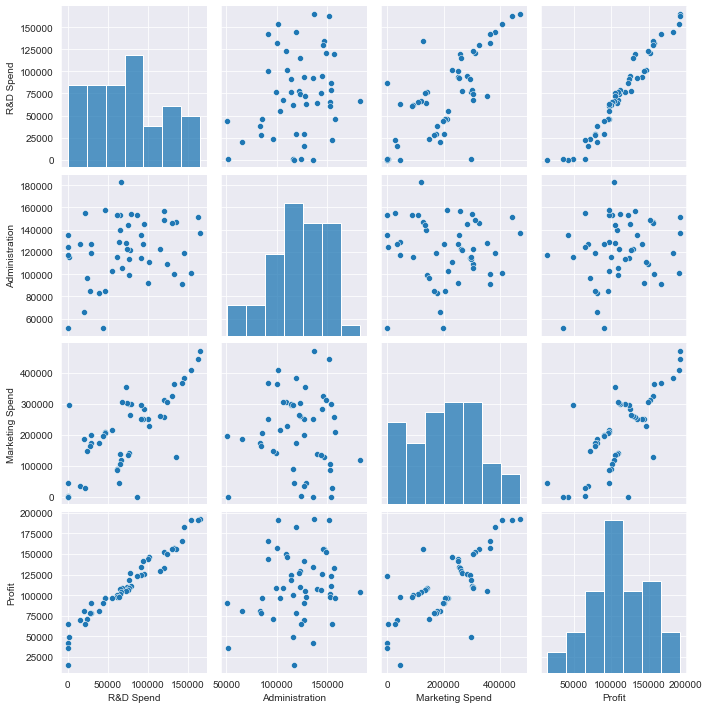

In [51]:
sns.set_style(style = 'darkgrid')
sns.pairplot(data)

In [52]:
data = data.rename({'R&D Spend':'RD','Administration':'Admin','Marketing Spend':'Marketing'},axis=1)

## Model Preparation

In [53]:
model_1 = smf.ols("Profit ~ RD+Admin+Marketing",data = data).fit()

In [31]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 19 Jan 2022   Prob (F-statistic):           4.53e-30
Time:                        19:32:31   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD             0.8057      0.045     17.846      0.000       0.715       0.897
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing      0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
model_1.params

Intercept    50122.192990
RD               0.805715
Admin           -0.026816
Marketing        0.027228
dtype: float64

In [34]:
model_1.aic

1058.7714985998055

In [35]:
model_2 = smf.ols("Profit ~ Admin",data = data).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Wed, 19 Jan 2022   Prob (F-statistic):              0.162
Time:                        19:54:54   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Admin          0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
model_3 = smf.ols("Profit ~ Marketing",data = data).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Wed, 19 Jan 2022   Prob (F-statistic):           4.38e-10
Time:                        19:55:38   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing      0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
model_4 = smf.ols("Profit ~ Admin + Marketing",data = data).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Wed, 19 Jan 2022   Prob (F-statistic):           2.50e-10
Time:                        21:06:17   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Admin          0.3237      0.131      2.468      0.017       0.060       0.588
Marketing      0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Calculating VIF

In [18]:

rsq_RD = smf.ols("RD ~ Admin+Marketing",data = data).fit().rsquared
vif_RD = 1/(1-rsq_RD)

rsq_Admin = smf.ols("Admin ~ RD+Marketing",data = data).fit().rsquared
vif_Admin = 1/(1-rsq_Admin)

rsq_Marketing = smf.ols("Marketing ~ Admin+RD",data = data).fit().rsquared
vif_Marketing = 1/(1-rsq_Marketing)

d1 = {'Variable':['RD','Admin','Marketing'],'VIF':[vif_RD,vif_Admin,vif_Marketing]}
Vif_Frame = pd.DataFrame(d1)
Vif_Frame

,Variable,VIF
0,RD,2.468903
1,Admin,1.175091
2,Marketing,2.326773


## Residual Analysis

In [21]:
model_1.resid.min()

-33533.7341112986

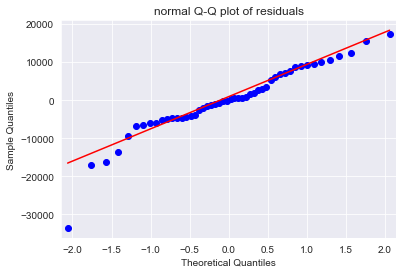

In [28]:
import statsmodels.api as sm
sm.qqplot(model_1.resid,line='q')
plt.title("normal Q-Q plot of residuals")
plt.show()

In [24]:
list(np.where(model_1.resid<-30000))

[array([49], dtype=int64)]

In [25]:
# Test for Homoscedasticity
def standard_values(vals):
    return(vals-vals.mean())/vals.std()

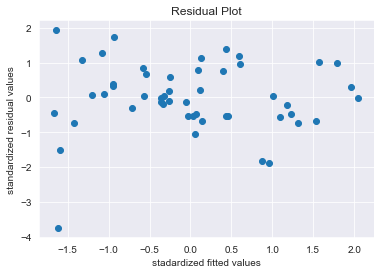

In [29]:
plt.scatter(standard_values(model_1.fittedvalues),standard_values(model_1.resid))
plt.title('Residual Plot')
plt.xlabel('stadardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

In [30]:
# Residuals vs Regressors

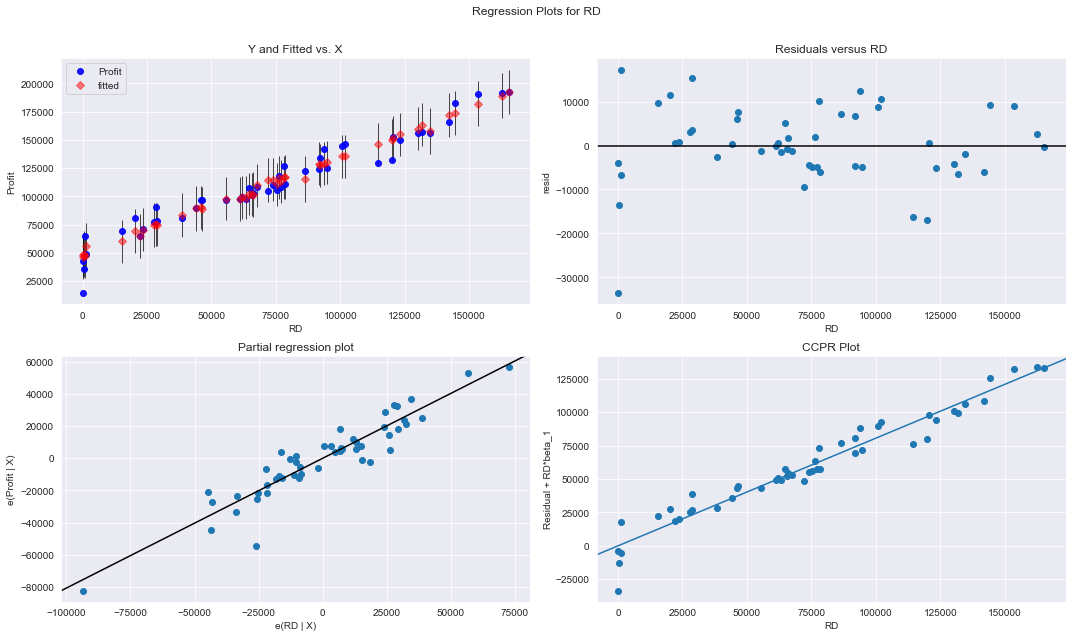

In [34]:
fig = plt.figure(figsize=(15,9))
sm.graphics.plot_regress_exog(model_1,'RD',fig=fig)
plt.show()

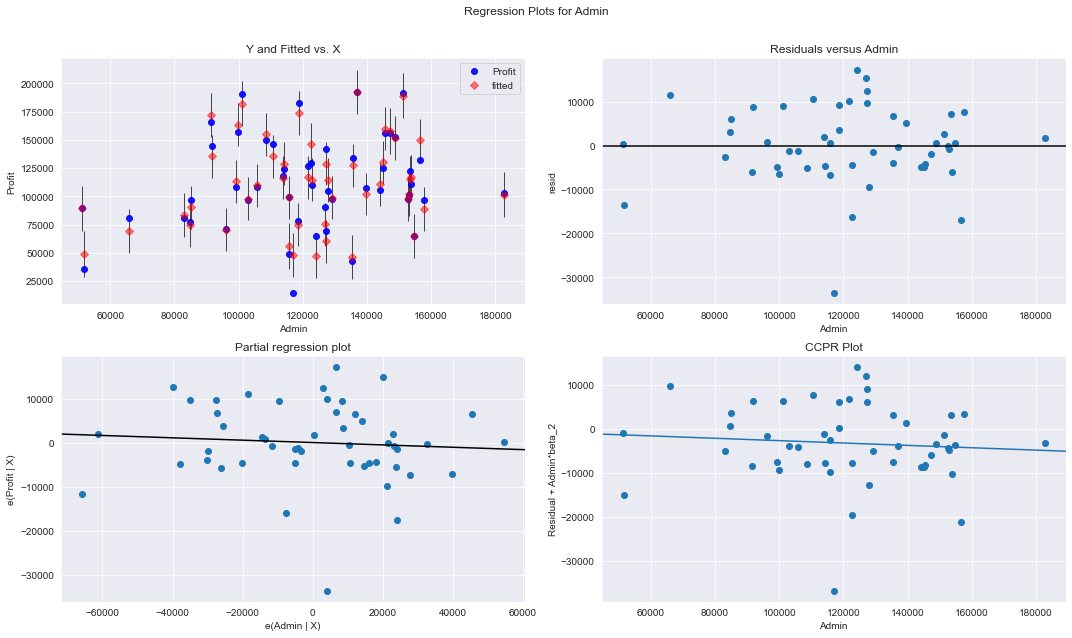

In [35]:
fig = plt.figure(figsize=(15,9))
sm.graphics.plot_regress_exog(model_1,'Admin',fig=fig)
plt.show()

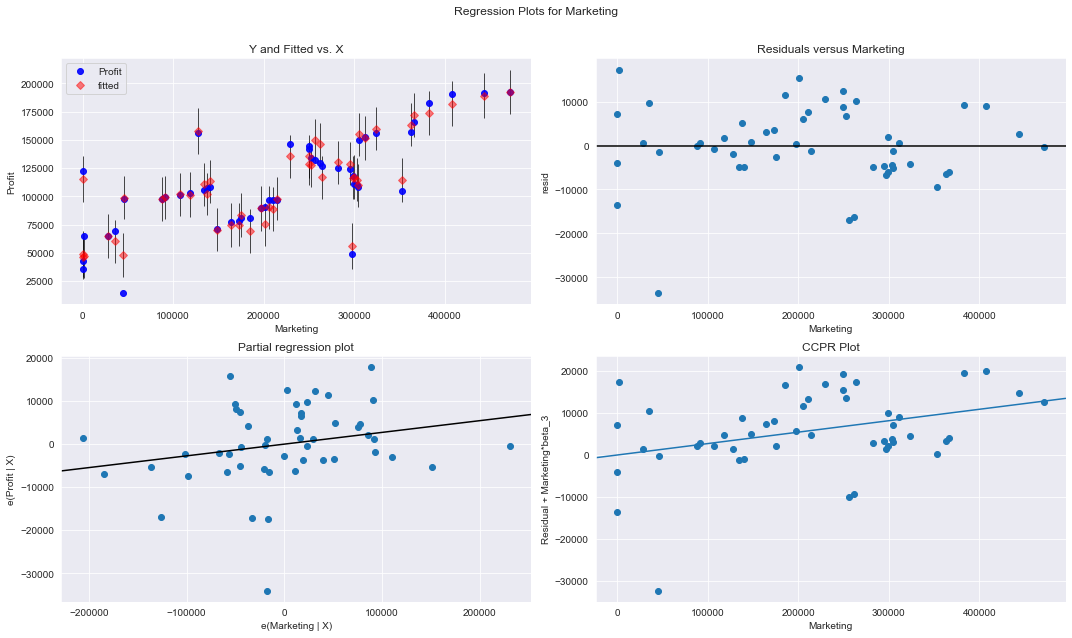

In [36]:
fig = plt.figure(figsize=(15,9))
sm.graphics.plot_regress_exog(model_1,'Marketing',fig=fig)
plt.show()

## Test for Outliers or Influencers

In [39]:
# Cook's Distance
(c,_) = model_1.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

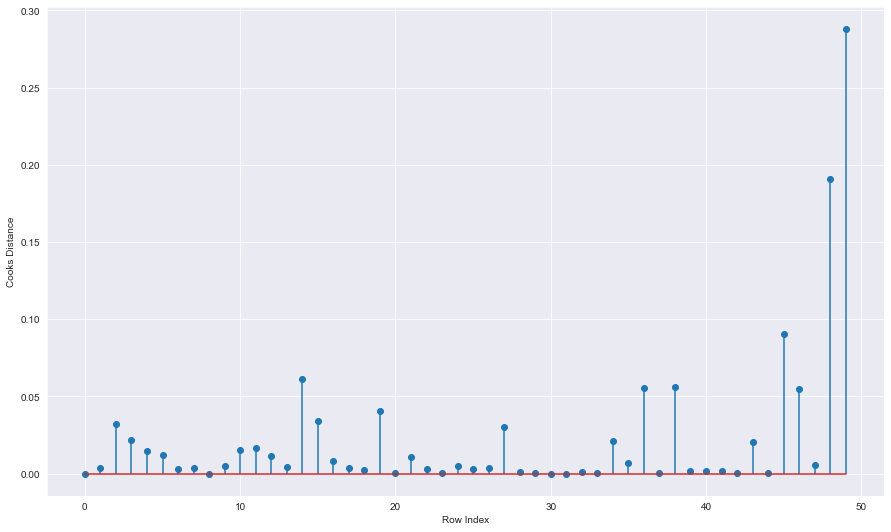

In [40]:
fig = plt.figure(figsize=(15,9))
plt.stem(np.arange(len(data)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [41]:
np.argmax(c),np.max(c)

(49, 0.28808229275432634)

In [42]:
# High Influence Plot
from statsmodels.graphics.regressionplots import influence_plot

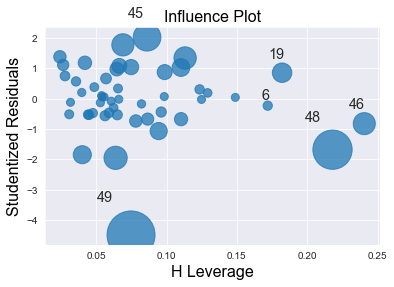

In [43]:
influence_plot(model_1)
plt.show()

In [45]:
data.shape

(50, 5)

In [46]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [47]:
data[data.index.isin([49])]

,RD,Admin,Marketing,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


## Improving the model

In [54]:
data_new = pd.read_csv('50_Startups.csv')

In [56]:
data_new.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [79]:
data2 =data_new.drop(data_new.index[[49]],axis=0).reset_index(drop=True)
data2.shape

(49, 5)

In [69]:
data2 = data2.rename({'R&D Spend':'RDS','Administration':'Admin','Marketing Spend':'Marketing'},axis=1)

In [70]:
final_model = smf.ols("Profit~ RDS+Marketing",data =data2).fit()

In [65]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           3.74e-33
Time:                        15:55:04   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
RDS            0.7754      0.035     22.136      0.000       0.705       0.846
Marketing      0.0274      0.013      2.104      0.041       0.001       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

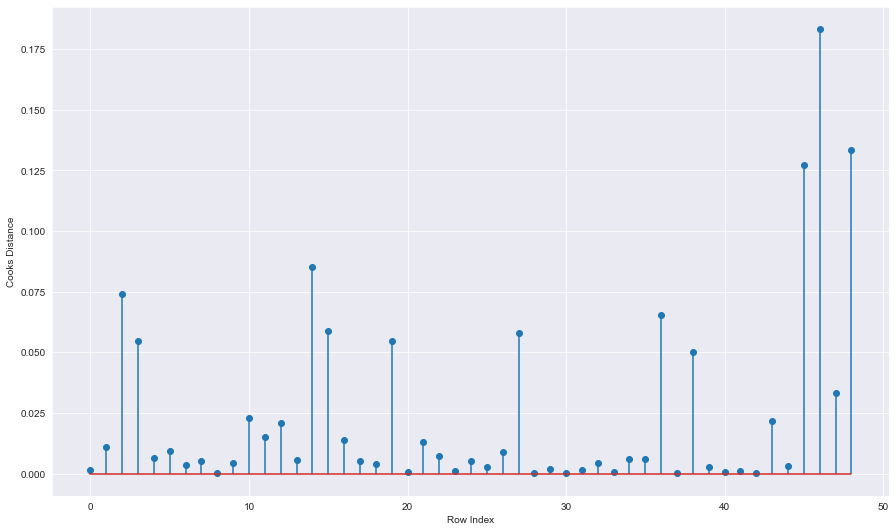

In [72]:
(c,_) = final_model.get_influence().cooks_distance
fig = plt.figure(figsize=(15,9))
plt.stem(np.arange(len(data2)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [67]:
# No more c > 0.5 , hence we finalise this model

In [68]:
final_model.rsquared,final_model.aic

(0.9610856807456628, 1018.8564801588338)

## Prediction of a new data point

In [75]:
pred_data = pd.DataFrame({'RDS':205000,'Admin':100000,'Marketing':200000},index=[1])
pred_data

,RDS,Admin,Marketing
1,205000,100000,200000


In [76]:
final_model.predict(pred_data)

1    214228.064051
dtype: float64

In [77]:
final_model.predict(data2)

0     190942.726927
1     188043.924520
2     179957.312472
3     172246.416164
4     170022.687457
5     161999.405410
6     157669.178690
7     159705.298181
8     151804.380605
9     153787.521922
10    135096.466868
11    134699.049858
12    129422.677987
13    128049.202655
14    149827.450777
15    145769.611357
16    117530.489091
17    130936.300519
18    129020.306206
19    116793.710748
20    117108.281313
21    118793.642939
22    115484.209637
23    110513.437292
24    113382.099441
25    103711.697086
26    111873.132740
27    115389.649335
28    104243.190309
29    103595.167960
30    100355.932697
31     99610.626757
32    100216.309933
33     98705.145163
34     91568.745065
35     91104.335025
36     77530.715090
37     89363.970985
38     70555.662763
39     84485.861451
40     76823.378730
41     75926.972539
42     72178.031523
43     62783.416125
44     67759.192437
45     50613.086380
46     58959.714353
47     49785.269847
48     50205.566671
dtype: float64